# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
df = pd.read_csv("datasets/athlete_events.csv")

# Filtrer pour l'année 2016 et seulement les gagnants de médailles
df_2016 = df[(df['Year'] == 2016) & (df['Medal'].notnull())]

# Trouver les 5 sports avec le plus de médailles
top_sports = df_2016['Sport'].value_counts().head(5).index.tolist()
df_top_sports = df_2016[df_2016['Sport'].isin(top_sports)]
print(df_2016)
print(df_top_sports)

            ID                             Name Sex   Age  Height  Weight  \
158         62                Giovanni Abagnale   M  21.0   198.0    90.0   
161         65                Patimat Abakarova   F  21.0   165.0    49.0   
175         73                        Luc Abalo   M  31.0   182.0    86.0   
450        250             Saeid Morad Abdevali   M  26.0   170.0    80.0   
794        455      Denis Mikhaylovich Ablyazin   M  24.0   161.0    62.0   
...        ...                              ...  ..   ...     ...     ...   
269511  134857                         Zhu Ting   F  21.0   198.0    78.0   
270111  135132                    Bojana ivkovi   F  28.0   186.0    72.0   
270281  135205  Shakhobiddin Shokirovich Zoirov   M  23.0   169.0    52.0   
270370  135245                     Milenko Zori   M  27.0   179.0    73.0   
271019  135525                   Martin Zwicker   M  29.0   175.0    64.0   

              Team  NOC        Games  Year  Season            City  \
158  

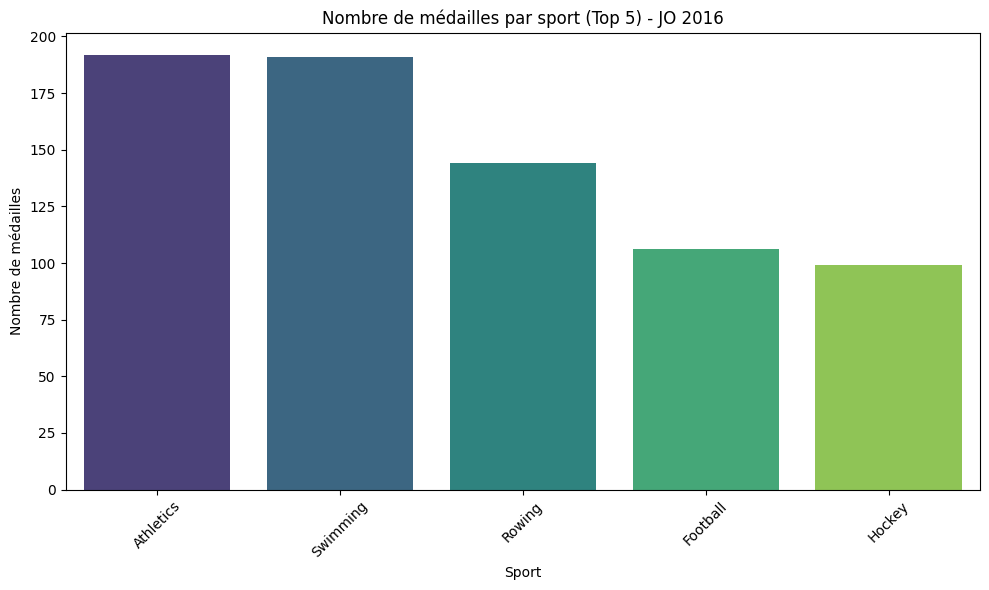

In [9]:
# 1. Plot du nombre de médailles dans chaque sport du top 5
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_sports, x='Sport', order=top_sports, palette="viridis")
plt.title("Nombre de médailles par sport (Top 5) - JO 2016")
plt.ylabel("Nombre de médailles")
plt.xlabel("Sport")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

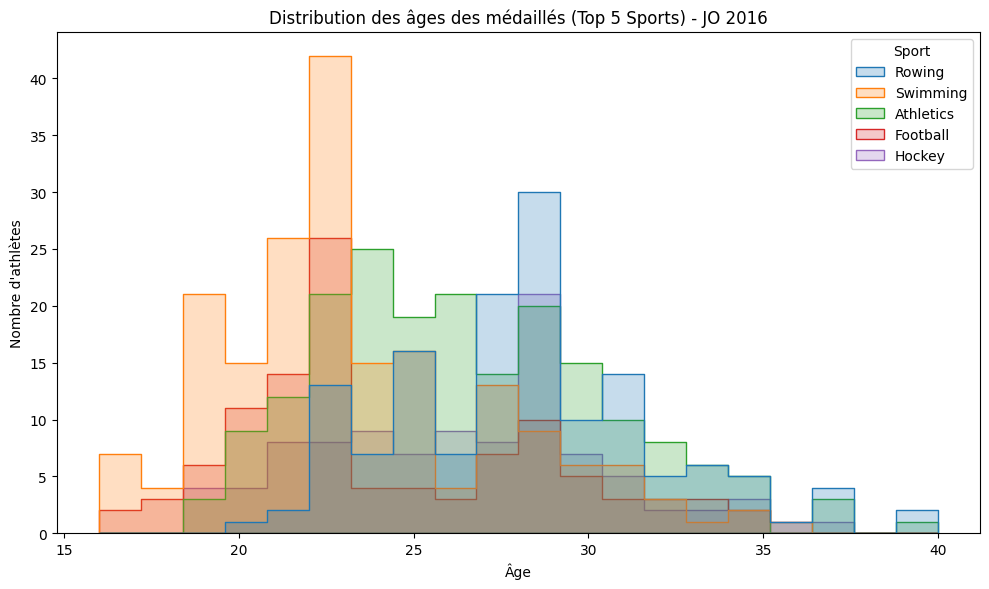

In [10]:
# 2. Distribution de l'âge des gagnants dans les 5 sports
plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_sports, x='Age', hue='Sport', element='step', bins=20, palette="tab10")
plt.title("Distribution des âges des médaillés (Top 5 Sports) - JO 2016")
plt.xlabel("Âge")
plt.ylabel("Nombre d'athlètes")
plt.tight_layout()
plt.show()

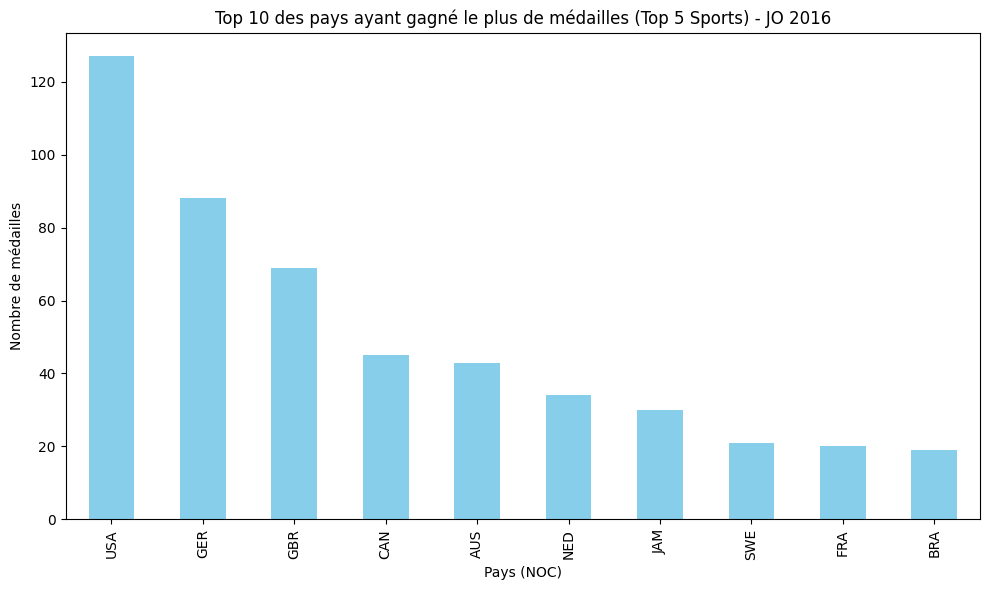

In [11]:
# 3. Médailles par équipe nationale
medals_by_team = df_top_sports.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
medals_by_team.plot(kind='bar', color='skyblue')
plt.title("Top 10 des pays ayant gagné le plus de médailles (Top 5 Sports) - JO 2016")
plt.ylabel("Nombre de médailles")
plt.xlabel("Pays (NOC)")
plt.tight_layout()
plt.show()

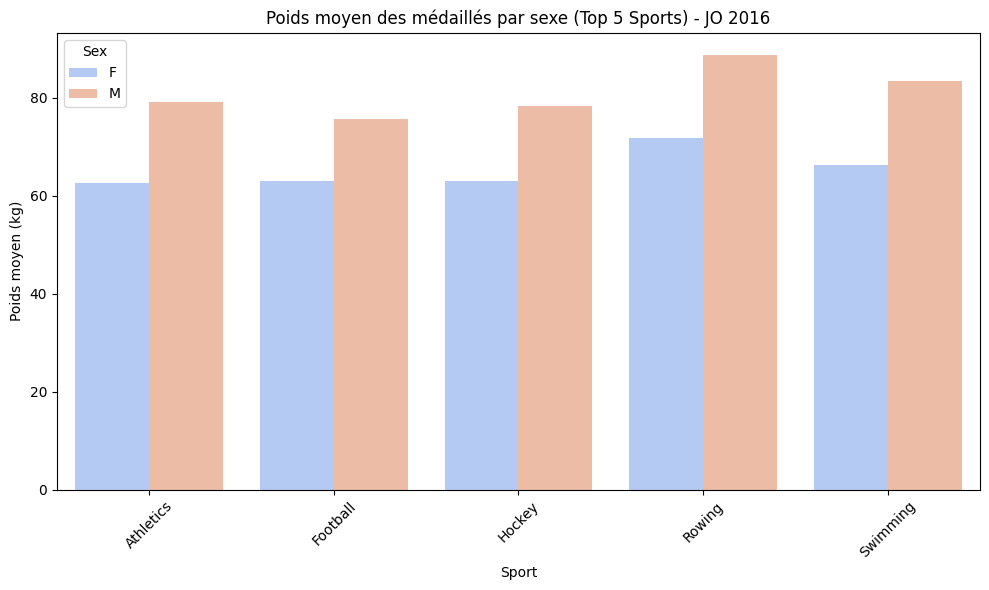

In [12]:
# 4. Poids moyen par sexe et par sport
avg_weight = df_top_sports.groupby(['Sport', 'Sex'])['Weight'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_weight, x='Sport', y='Weight', hue='Sex', palette="coolwarm")
plt.title("Poids moyen des médaillés par sexe (Top 5 Sports) - JO 2016")
plt.ylabel("Poids moyen (kg)")
plt.xlabel("Sport")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
#PART 2
# Étape 1 : Télécharger le dataset et le charger dans un DataFrame
import pandas as pd
df = pd.read_csv('datasets/athlete_events.csv')

In [21]:
# Étape 2 : Filtrer les lignes correspondant aux médaillés de 2016
df_2016 = df[(df['Year'] == 2016) & (df['Medal'].notna())]
print(df_2016)

            ID                             Name Sex   Age  Height  Weight  \
158         62                Giovanni Abagnale   M  21.0   198.0    90.0   
161         65                Patimat Abakarova   F  21.0   165.0    49.0   
175         73                        Luc Abalo   M  31.0   182.0    86.0   
450        250             Saeid Morad Abdevali   M  26.0   170.0    80.0   
794        455      Denis Mikhaylovich Ablyazin   M  24.0   161.0    62.0   
...        ...                              ...  ..   ...     ...     ...   
269511  134857                         Zhu Ting   F  21.0   198.0    78.0   
270111  135132                    Bojana ivkovi   F  28.0   186.0    72.0   
270281  135205  Shakhobiddin Shokirovich Zoirov   M  23.0   169.0    52.0   
270370  135245                     Milenko Zori   M  27.0   179.0    73.0   
271019  135525                   Martin Zwicker   M  29.0   175.0    64.0   

              Team  NOC        Games  Year  Season            City  \
158  

In [22]:
# Étape 3 : Compter les médailles attribuées en 2016 pour chaque sport
medals_by_sport = df_2016['Sport'].value_counts()
print(medals_by_sport)

Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Basketball                72
Volleyball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Sailing                   45
Shooting                  45
Equestrianism             45
Weightlifting             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Badminton                 24
Tennis                    24
Table Tennis              24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: Sport, d

In [23]:
# Étape 4 : Identifier les 5 sports avec le plus de médailles, et filtrer les données pour ces sports
top5_sports = medals_by_sport.head(5).index.tolist()
df_top5 = df_2016[df_2016['Sport'].isin(top5_sports)]
print(df_top5)

            ID                                  Name Sex   Age  Height  \
158         62                     Giovanni Abagnale   M  21.0   198.0   
814        465                  Matthew "Matt" Abood   M  30.0   197.0   
1228       690                    Chantal Achterberg   F  31.0   172.0   
1529       846  Valerie Kasanita Adams-Vili (-Price)   F  31.0   193.0   
1847      1017                Nathan Ghar-Jun Adrian   M  27.0   198.0   
...        ...                                   ...  ..   ...     ...   
265312  132776                  Julius Kiplagat Yego   M  27.0   175.0   
267136  133648                Shelina Laura Zadorsky   F  23.0   172.0   
268247  134211                Jos Carlos Cracco Neto   M  22.0   170.0   
268944  134559                          Zhang Wenxiu   F  30.0   183.0   
271019  135525                        Martin Zwicker   M  29.0   175.0   

        Weight           Team  NOC        Games  Year  Season            City  \
158       90.0          Italy 

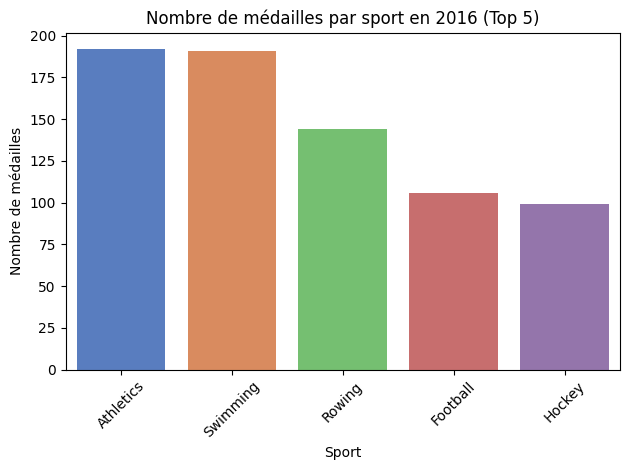

In [24]:
# Étape 5 : Bar plot du nombre de médailles pour les 5 sports principaux
plt.figure()
sns.barplot(x=medals_by_sport.loc[top5_sports].index, y=medals_by_sport.loc[top5_sports].values, palette='muted')
plt.title('Nombre de médailles par sport en 2016 (Top 5)')
plt.xlabel('Sport')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

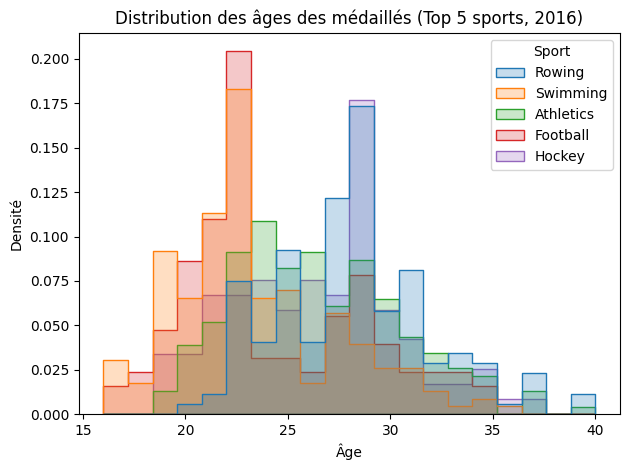

In [25]:
# Étape 6 : Histogramme des âges des médaillés dans les 5 sports principaux
plt.figure()
sns.histplot(data=df_top5, x='Age', bins=20, hue='Sport', element='step', stat='density', common_norm=False)
plt.title('Distribution des âges des médaillés (Top 5 sports, 2016)')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.tight_layout()
plt.show()

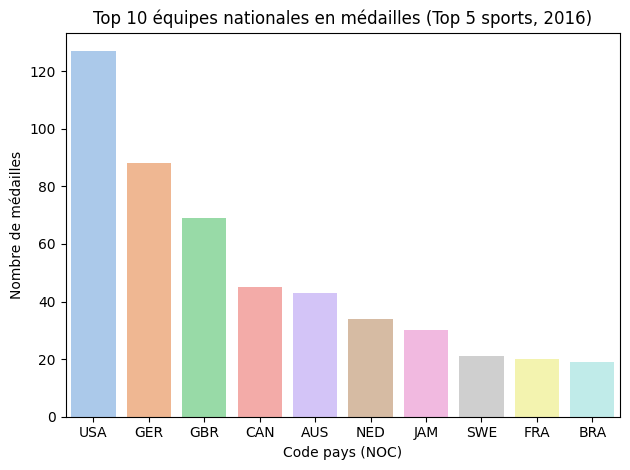

In [26]:
# Étape 7 : Bar plot des médailles par équipe nationale dans les 5 sports principaux
team_medals = df_top5['NOC'].value_counts().head(10)
plt.figure()
sns.barplot(x=team_medals.index, y=team_medals.values, palette='pastel')
plt.title('Top 10 équipes nationales en médailles (Top 5 sports, 2016)')
plt.xlabel('Code pays (NOC)')
plt.ylabel('Nombre de médailles')
plt.tight_layout()
plt.show()

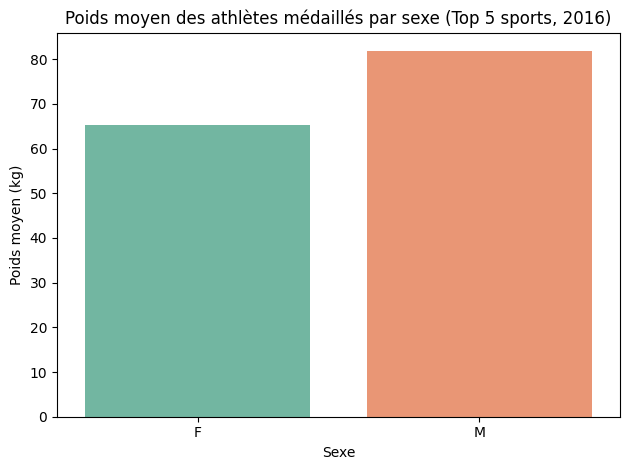

In [27]:
# Étape 8 : Bar plot du poids moyen par sexe parmi les médaillés dans les 5 sports principaux
df_weight = df_top5[df_top5['Weight'].notna()]
avg_weight = df_weight.groupby('Sex')['Weight'].mean().reset_index()

plt.figure()
sns.barplot(data=avg_weight, x='Sex', y='Weight', palette='Set2')
plt.title("Poids moyen des athlètes médaillés par sexe (Top 5 sports, 2016)")
plt.xlabel("Sexe")
plt.ylabel("Poids moyen (kg)")
plt.tight_layout()
plt.show() 